# TEST NOTEBOOK

In [1]:
%matplotlib widget
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent))
from src.utils import find_coeffs, print_code
# from utils import find_coeffs, print_code
import inspect
from subprocess import check_output
from IPython.core.display import HTML
output = print_code(find_coeffs)
HTML(output)

In [2]:
print(inspect.getsource(find_coeffs))

def find_coeffs(pa, pb): # https://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)



In [3]:
from utils import find_coeffs
import inspect
from subprocess import check_output
from IPython.core.display import HTML

output = check_output(["pygmentize", "-f", "html", "-O", "noclasses,lineanchors,linenos,style=native", "-l", "python"],
                     input=inspect.getsource(find_coeffs), encoding='ascii')

# Define a custom CSS class to align the code to the left
custom_css = """
<style>
.code {
    text-align: left;
    background-color: black; /* Set the background color */
    }
</style>
"""

# Embed the code block in a div with the custom CSS class
html_code = f"""
{custom_css}
<div class="code">
{output}
</div>
"""

HTML(html_code)


1 2 3 4 5 6 7 8 9 10 11


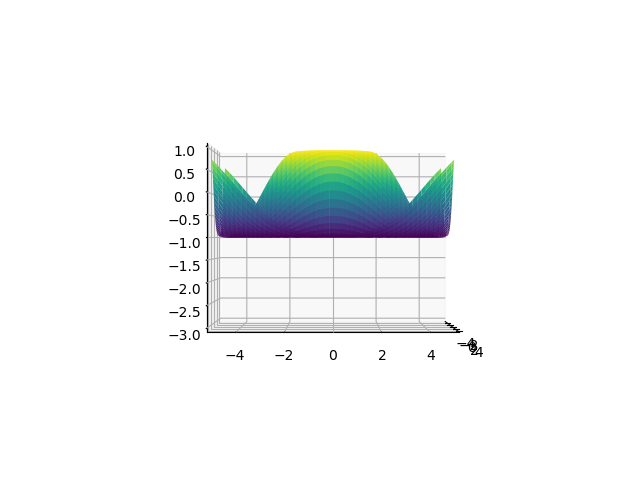

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create some example data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the view angles using view_init
ax.view_init(azim=0, elev=0)

# Set the view coordinates by adjusting the axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-3, 1)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()


In [5]:
def generate_range(mean, height):
    # Calculate the lower and upper bounds for the range
    lower_bound = min(0, 2*mean - height)
    upper_bound = max(height, 2*mean)
    
    # Return the range as a tuple
    return (lower_bound, upper_bound)

mean_value = -2
height_value = 10
result_range = generate_range(mean_value, height_value)
print(result_range)

(-14, 10)


In [6]:
from subprocess import check_output
from IPython.display import HTML
import inspect

def pygmentize_source_code(source_code, language="python"):
    # Define the Pygmentize command and arguments
    command = ["pygmentize", "-f", "html", "-O", "noclasses, lineanchors,style=native", "-l", language]

    # Get the HTML output using check_output
    output = check_output(command, input=source_code, encoding="ascii")

    # Display the HTML using IPython.display
    return HTML(output)

# Example usage:
# def find_coeffs(x, y):
#     return x + y

source_code = inspect.getsource(find_coeffs)
html_output = pygmentize_source_code(source_code, language="python")
html_output


In [7]:
import numpy as np

def calculate_points(direction, radius, turbine_origin):
    angle = np.deg2rad(direction)  # Convert direction to radians if necessary
    x_offset = radius * np.cos(angle)
    y_offset = radius * np.sin(angle)

    point1 = np.array([turbine_origin[0] - x_offset, turbine_origin[1] - y_offset, 0])
    point2 = np.array([turbine_origin[0] + x_offset, turbine_origin[1] + y_offset, 0])

    return point1, point2

# Example usage:
direction = 180  # Angle in degrees
radius = 10  # Radius
turbine_origin = np.array([0, 0, 0])  # Origin point

point1, point2 = calculate_points(direction, radius, turbine_origin)
print("Point 1:", point1)
print("Point 2:", point2)


Point 1: [ 1.0000000e+01 -1.2246468e-15  0.0000000e+00]
Point 2: [-1.0000000e+01  1.2246468e-15  0.0000000e+00]


In [8]:
import numpy as np
object_position = np.array([1, -1])  # Replace with your own vector
scale_factor = 1

def object_frame_boundaries(object_position, scale_factor):

    object_position_normalized = object_position / np.linalg.norm(object_position)

    # Calculate two perpendicular vectors with a total length of 1
    perpendicular_vector1 = np.array([-object_position_normalized[1], object_position_normalized[0]])
    perpendicular_vector2 = np.array([object_position_normalized[1], -object_position_normalized[0]])

    # Scale the perpendicular vectors to have a total length of scale_factor
    scale_factor = 1 / np.linalg.norm(perpendicular_vector1)
    perpendicular_vector1 *= scale_factor
    perpendicular_vector2 *= scale_factor

    # Calculate the end positions of the perpendicular vectors
    end_position1 = object_position + perpendicular_vector1
    end_position2 = object_position + perpendicular_vector2
    return end_position1, end_position2

end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)


End position of perpendicular vector 1: [ 1.70710678 -0.29289322]
End position of perpendicular vector 2: [ 0.29289322 -1.70710678]


In [9]:
import numpy as np
object_position = np.array([2, -2.0])  # Replace with your own vector
scale_factor = 5

def object_frame_boundaries(object_position, scale_factor):
    perp_vector = np.array([-object_position[1], object_position[0]])
    perp_vector = perp_vector/(np.linalg.norm(perp_vector) / scale_factor)
    return object_position + perp_vector, object_position - perp_vector
end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)

End position of perpendicular vector 1: [5.53553391 1.53553391]
End position of perpendicular vector 2: [-1.53553391 -5.53553391]


In [10]:
import cython_test

ModuleNotFoundError: No module named 'cython_test'

In [ ]:
import numpy as np
def power_number(arr, power):

    return arr ** power

print(power_number(np.array([2.2, 23]), 99))

[7.94045523e+033 6.47225718e+134]


In [ ]:
import numpy as np
import sys
sys.path.insert(0, './cython')
import power


power.power(np.array([2.2, 23]), 99)


array([7.94045523e+033, 6.47225718e+134])

In [1]:
%load_ext line_profiler
%lprun -f solve_shadow_map solve_shadow_map(terrain_elevation_map, ray_vec, ray_point, grid_element_size)

40.1 ns ± 0.0215 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [40]:
import numpy as np

"""
"""
def rayBoxIntersection(origin, direction, vmin, vmax):
  box = (vmin, vmax)

  flag = 0
  tmin = 0

  if direction[0] >= 0:
    tmin = (vmin[0] - origin[0]) / direction[0]
    tmax = (vmax[0] - origin[0]) / direction[0]
  else:
    tmin = (vmax[0] - origin[0]) / direction[0]
    tmax = (vmin[0] - origin[0]) / direction[0]
  
  if (direction[1] >= 0):
    tYmin = (vmin[1] - origin[1]) / direction[1]
    tYmax = (vmax[1] - origin[1]) / direction[1]
  else:
    tYmin = (vmax[1] - origin[1]) / direction[1]
    tYmax = (vmin[1] - origin[1]) / direction[1]

  if (tmin > tYmax) or (tYmin > tmax):
    tmin = -1
    return (flag, tmin)
  
  if tYmin > tmin:
    tmin = tYmin
  
  if tYmax < tmax:
    tmax = tYmax
  
  if direction[2] >= 0:
    tZmin = (vmin[2] - origin[2]) / direction[2]
    tZmax = (vmax[2] - origin[2]) / direction[2]
  else:
    tZmin = (vmax[2] - origin[2]) / direction[2]
    tZmax = (vmin[2] - origin[2]) / direction[2]
  
  if (tmin > tZmax) or (tZmin > tmax):
    tmin = -1
    return (flag, tmin)
  
  if tZmin > tmin:
    tmin = tZmin
  
  if tZmax < tmax:
    tmax = tZmax

  flag = 1
  return (flag, tmin)

def amanatidesWoo(origin, direction, grid3D, verbose=True):
  flag, tmin = rayBoxIntersection(origin, direction, grid3D['minBound'], grid3D['maxBound'])

  if flag == 0:
    print('The ray does not intersect the grid')
    pass
  else:
    if tmin < 0:
      tmin = 0
    
    start = origin + tmin * direction
    boxSize = grid3D['maxBound'] - grid3D['minBound']

    if verbose:
      # plot start[0], start[1], start[2]
      pass

    x = np.floor(((start[0] - grid3D['minBound'][0]) / boxSize[0]) * grid3D['nx']) + 1
    y = np.floor(((start[1] - grid3D['minBound'][1]) / boxSize[1]) * grid3D['ny']) + 1
    z = np.floor(((start[2] - grid3D['minBound'][2]) / boxSize[2]) * grid3D['nz']) + 1

    if x == grid3D['nx'] + 1:
      x -= 1
    if y == grid3D['ny'] + 1:
      y -= 1
    if z == grid3D['nz'] + 1:
      z -= 1
    
    if direction[0] >= 0:
      tVoxelX = x / grid3D['nx']
      stepX = 1
    else:
      tVoxelX = (x - 1) / grid3D['nx']
      stepX = -1
    
    if direction[1] >= 0:
      tVoxelY = y / grid3D['ny']
      stepY = 1
    else:
      tVoxelY = (y - 1) / grid3D['ny']
      stepY = -1
    
    if direction[2] >= 0:
      tVoxelZ = z / grid3D['nz']
      stepZ = 1
    else:
      tVoxelZ = (z - 1) / grid3D['nz']
      stepZ = -1
    
    voxelMaxX = grid3D['minBound'][0] + tVoxelX*boxSize[0]
    voxelMaxY = grid3D['minBound'][1] + tVoxelY*boxSize[1]
    voxelMaxZ = grid3D['minBound'][2] + tVoxelZ*boxSize[2]
    tMaxX     = tmin + (voxelMaxX - start[0]) / direction[0]
    tMaxY     = tmin + (voxelMaxY - start[1]) / direction[1]
    tMaxZ     = tmin + (voxelMaxZ - start[2]) / direction[2]
    
    voxelSizeX = boxSize[0] / grid3D['nx']
    voxelSizeY = boxSize[1] / grid3D['ny']
    voxelSizeZ = boxSize[2] / grid3D['nz']        
    
    tDeltaX = voxelSizeX / abs(direction[0])
    tDeltaY = voxelSizeY / abs(direction[1])
    tDeltaZ = voxelSizeZ / abs(direction[2])

    while (x <= grid3D['nx']) and (x >= 1) and (y <= grid3D['ny']) and (y >= 1) and (z <= grid3D['nz']) and (z >= 1):
      if verbose:
        print(f'Intersection: voxel = ({x} {y} {z})')

      # Check if voxel (x, y, z) contains any intersection with the ray
      # if {intersection}:
      #      break

      if tMaxX < tMaxY:
        if tMaxX < tMaxZ:
          x = x + stepX
          tMaxX = tMaxX + tDeltaX
        else:
          z = z + stepZ
          tMaxZ = tMaxZ + tDeltaZ
      else:
        if tMaxY < tMaxZ:
          y = y + stepY
          tMaxY = tMaxY + tDeltaY
        else:
          z = z + stepZ
          tMaxZ = tMaxZ + tDeltaZ

origin = np.array([5, 5, 15])
direction = np.array([0.1, 0.1, -1])
grid3D = {"minBound" : np.array([0, 0, 0]),
          "maxBound" : np.array([10, 10, 10]),
        "nx" : 10,
        "ny" : 10,
        "nz" : 10}
# visited_vox = amanatidesWoo(origin, direction, grid3D, verbose=True)

# %load_ext line_profiler
%lprun -f amanatidesWoo amanatidesWoo(origin, direction, grid3D, verbose=True)

Intersection: voxel = (6.0 6.0 10.0)
Intersection: voxel = (6.0 6.0 9.0)
Intersection: voxel = (6.0 6.0 8.0)
Intersection: voxel = (6.0 6.0 7.0)
Intersection: voxel = (6.0 6.0 6.0)
Intersection: voxel = (6.0 6.0 5.0)
Intersection: voxel = (6.0 7.0 5.0)
Intersection: voxel = (7.0 7.0 5.0)
Intersection: voxel = (7.0 7.0 4.0)
Intersection: voxel = (7.0 7.0 3.0)
Intersection: voxel = (7.0 7.0 2.0)
Intersection: voxel = (7.0 7.0 1.0)


Timer unit: 1e-09 s

Total time: 0.000581853 s
File: /tmp/ipykernel_876/179161765.py
Function: amanatidesWoo at line 55

Line #      Hits         Time  Per Hit   % Time  Line Contents
    55                                           def amanatidesWoo(origin, direction, grid3D, verbose=True):
    56         1      22769.0  22769.0      3.9    flag, tmin = rayBoxIntersection(origin, direction, grid3D['minBound'], grid3D['maxBound'])
    57                                           
    58         1       1466.0   1466.0      0.3    if flag == 0:
    59                                               print('The ray does not intersect the grid')
    60                                               pass
    61                                             else:
    62         1       1467.0   1467.0      0.3      if tmin < 0:
    63                                                 tmin = 0
    64                                               
    65         1     288167.0 288167.0     49.5      

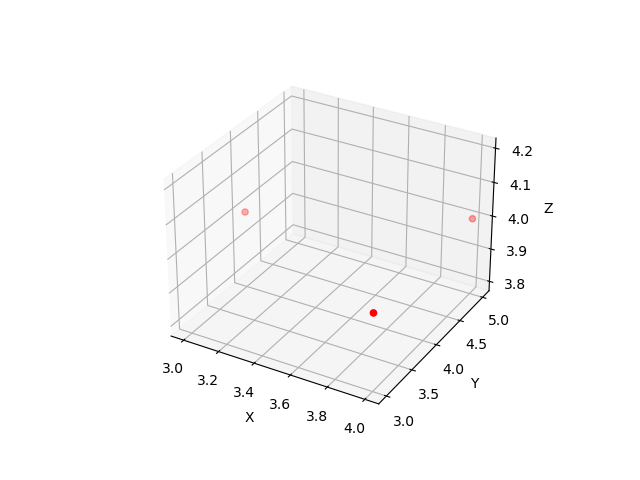

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
def is_voxel_in_sphere(i, j, k, resolutions, origin, radius, theta):
    # Calculate the center of the voxel
    cx = i * resolutions[0] + resolutions[0] / 2
    cy = j * resolutions[1] + resolutions[1] / 2
    cz = k * resolutions[2] + resolutions[2] / 2

    # Calculate the angle difference between the center of the voxel and the origin
    angle_diff = abs(math.atan2(cy - origin[1], cx - origin[0]))
    
    # Calculate the distance from the origin to the voxel's center
    distance = math.sqrt((origin[0] - cx) ** 2 + (origin[1] - cy) ** 2 + (origin[2] - cz) ** 2)

    # Check if the distance is within the sphere's radius and the angle difference is within the specified range
    if distance <= radius and angle_diff: #<= theta / 2:
        return True
    else:
        return False

# Example usage
origin = (4.5, 4.5, 4.5)
radius = 1.1
angle = math.radians(90)  # 90 degrees converted to radians

resolutions = (1.0, 1.0, 1.0)  # Voxel space resolutions for x, y, and z

# Create an empty array to store voxel status (inside/outside the sphere)
voxel_status = np.zeros((11, 11, 11), dtype=bool)

for i in range(11):  # Iterate through x-indices
    for j in range(11):  # Iterate through y-indices
        for k in range(11):  # Iterate through z-indices
            if is_voxel_in_sphere(i, j, k, resolutions, origin, radius, angle):
                voxel_status[i, j, k] = True

# Plot the voxels inside the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the coordinates of the voxels inside the sphere
x, y, z = np.where(voxel_status)

# Plot the voxels as red points
ax.scatter(x, y, z, c='red', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


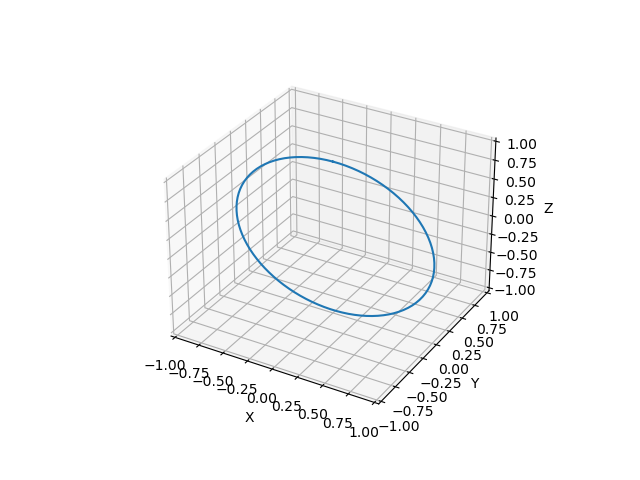

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_circle_3d(origin, radius, azimuth_angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate points on the circle
    theta = np.linspace(0, 2*np.pi, 100)
    x = origin[0] + radius * np.cos(theta)
    y = origin[1] + np.zeros_like(theta)
    z = origin[2] + radius * np.sin(theta)

    # Rotate the circle around the y-axis
    rotation_matrix = np.array([
        [np.cos(azimuth_angle), 0, np.sin(azimuth_angle)],
        [0, 1, 0],
        [-np.sin(azimuth_angle), 0, np.cos(azimuth_angle)]
    ])
    points = np.stack((x, y, z), axis=1)
    rotated_points = np.matmul(points, rotation_matrix)

    # Plot the circle
    ax.plot(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2])

    # Set plot limits and labels
    ax.set_xlim([origin[0] - radius, origin[0] + radius])
    ax.set_ylim([origin[1] - radius, origin[1] + radius])
    ax.set_zlim([origin[2] - radius, origin[2] + radius])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()

# Example usage
origin = [0, 0, 0]
radius = 1.0
azimuth_angle = np.pi/2

plot_circle_3d(origin, radius, azimuth_angle)

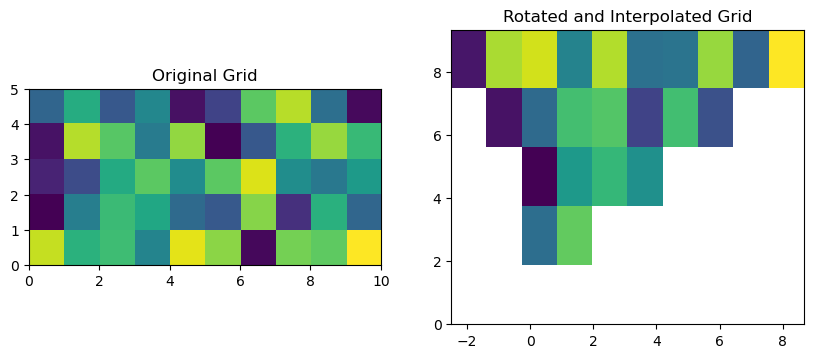

In [2]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define your original X, Y, and Z grids
# Replace these with your actual data
original_X = np.linspace(0, 10, 10)
original_Y = np.linspace(0, 5, 5)
X, Y = np.meshgrid(original_X, original_Y)
Z = np.random.rand(original_Y.size, original_X.size)

# Define the desired angle for the new orientation (in radians)
desired_angle = np.pi / 6  # 90 degrees (vertical) - you can change this

# Calculate the rotation matrix
rotation_matrix = np.array([[np.cos(desired_angle), -np.sin(desired_angle)],
                            [np.sin(desired_angle), np.cos(desired_angle)]])

# Rotate the original X and Y grids
rotated_X, rotated_Y = np.dot(rotation_matrix, np.vstack((X.flatten(), Y.flatten())))

# Reshape the rotated grids back to their original shape
rotated_X = rotated_X.reshape(X.shape)
rotated_Y = rotated_Y.reshape(Y.shape)

# Interpolate elevation values
new_Z = griddata((X.flatten(), Y.flatten()), Z.flatten(), (rotated_X, rotated_Y), method='linear')

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Z, extent=(original_X.min(), original_X.max(), original_Y.min(), original_Y.max()))
plt.title('Original Grid')

plt.subplot(1, 2, 2)
plt.imshow(new_Z, extent=(rotated_X.min(), rotated_X.max(), rotated_Y.min(), rotated_Y.max()))
plt.title('Rotated and Interpolated Grid')

plt.show()


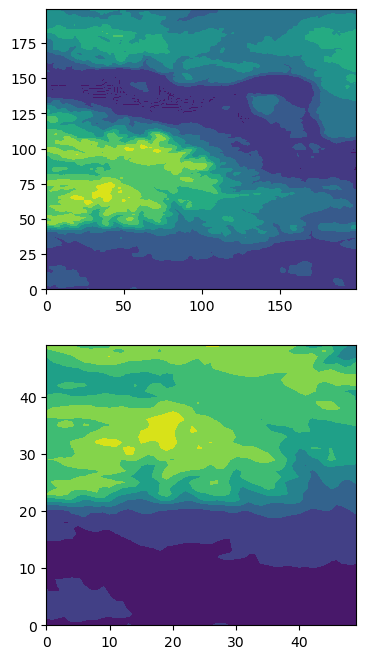

In [14]:
import numpy as np

def generate_subarray_old(self, subarray_bounds):
    start_long = np.argmin(np.abs(self.long_range - subarray_bounds[0]))
    end_long = np.argmin(np.abs(self.long_range - subarray_bounds[1])) 
    start_lat = np.argmin(np.abs(self.lat_range - subarray_bounds[2]))
    end_lat = np.argmin(np.abs(self.lat_range - subarray_bounds[3])) 
    
    subarray = self.merged_map[start_lat:end_lat+1, start_long:end_long+1]
    subarray_bounds = [self.long_range[start_long], self.long_range[end_long], self.lat_range[start_lat], self.lat_range[end_lat]]
    sublong_points = self.long_range[start_long:end_long+1]
    sublat_points = self.lat_range[start_lat:end_lat+1]
    
    return subarray, sublong_points, sublat_points, subarray_bounds



from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt

def generate_scaled_subarray(map_array, old_map_boundaries, new_map_boundaries, new_shape):
    x_old = np.linspace(old_map_boundaries[0], old_map_boundaries[1], map_array.shape[1])
    y_old = np.linspace(old_map_boundaries[2], old_map_boundaries[3], map_array.shape[0])

    interp_spline = RectBivariateSpline(x_old, y_old, map_array)
        
    x_new = np.linspace(new_map_boundaries[0], new_map_boundaries[1], new_shape[0])
    y_new = np.linspace(new_map_boundaries[2], new_map_boundaries[3], new_shape[1])

    scaled_subarray = interp_spline(x_new, y_new)
    return scaled_subarray

map_array = np.loadtxt("../assets/map.txt")
old_map_boundaries = [10, 11, 55, 56]
new_map_boundaries = [10.0, 10.5, 55.0, 55.5]
new_shape = [50, 50]

scaled_array = scaled_subarray(map_array, old_map_boundaries, new_map_boundaries, new_shape)

fig, axes = plt.subplots(2,1, figsize = (4, 8))
axes[0].contourf(map_array)
axes[1].contourf(scaled_array)